In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as snscollection_recovery_fee                     
import numpy as np
import os
import pandas as pd
import numpy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [6]:
df2=train_df.select_dtypes(include=object)
df2.columns
df2.shape

(12180, 8)

In [43]:
cat_train= pd.get_dummies(train_df.loc[:,['home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type', 'hardship_flag',
       'debt_settlement_flag']])
cat_train
cat_train2 = cat_train.drop(columns=['debt_settlement_flag_N', 'debt_settlement_flag_Y'])

# I decided to drop the column category debt_settlement as there is a discripency between the training and testing data.

In [44]:
cat_test = pd.get_dummies(test_df.loc[:,['home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type', 'hardship_flag',
       'debt_settlement_flag']])
cat_test
cat_test2=cat_test.drop(columns=['debt_settlement_flag_N'])

In [45]:
num_train = train_df.select_dtypes(include=float)
num_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [46]:
num_test = test_df.loc[:,['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']]
num_test

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,0.0,2.0,100.0,28.6,0.0,0.0,159688.0,110873.0,48400.0,107388.0
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,0.0,2.0,100.0,0.0,0.0,0.0,62375.0,18928.0,13300.0,30775.0
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,0.0,5.0,100.0,0.0,0.0,0.0,43250.0,33022.0,8500.0,29550.0
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,0.0,3.0,95.0,0.0,1.0,0.0,31357.0,19595.0,1500.0,9657.0


# I believe the Non-scaled Logistic Regression will be more accurate than the Non-scaled Random Forest. 


In [48]:
# Non-scale training set
df_train_cleaned = pd.concat([cat_train2, num_train], axis=1)
df_train_cleaned["loan_status"] = train_df.loan_status

df_train_cleaned["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train_cleaned.loan_status]
df_train_cleaned.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_high_risk,loan_status_low_risk,pymnt_plan_n,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,0,1,0,0,1,0,0,0,1,1,...,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0
1,0,1,0,0,0,1,0,0,1,1,...,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0
2,0,1,0,0,0,1,0,0,1,1,...,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0
3,0,0,0,1,1,0,0,0,1,1,...,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0
4,0,1,0,0,0,1,0,0,1,1,...,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0


In [49]:
# Non-scale testing set
df_test_cleaned = pd.concat([cat_test2, num_test], axis=1)
df_test_cleaned["loan_status"] = test_df.loan_status

df_test_cleaned["loan_status"] = [1 if x == "high_risk" else 0 for x in df_test_cleaned.loan_status]
df_test_cleaned.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_high_risk,loan_status_low_risk,pymnt_plan_n,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,0,1,0,0,1,0,0,0,1,1,...,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0
1,0,0,0,1,1,0,0,0,1,1,...,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0
2,0,0,0,1,1,0,0,0,1,1,...,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0
3,0,0,0,1,1,0,0,0,1,1,...,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0
4,0,0,0,1,1,0,0,0,1,1,...,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0


In [50]:
X_train = df_train_cleaned.drop(["loan_status"], axis=1).values
y_train = df_train_cleaned["loan_status"].values

X_test = df_test_cleaned.drop(["loan_status"], axis=1).values
y_test = df_test_cleaned["loan_status"].values

In [51]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

TRAINING SET
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      6090
           1       0.67      0.58      0.62      6090

    accuracy                           0.65     12180
   macro avg       0.65      0.65      0.65     12180
weighted avg       0.65      0.65      0.65     12180

[[4375 1715]
 [2550 3540]]

Testing SET
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2351
           1       0.53      0.30      0.38      2351

    accuracy                           0.52      4702
   macro avg       0.52      0.52      0.49      4702
weighted avg       0.52      0.52      0.49      4702

[[1719  632]
 [1642  709]]


C:\Users\sslomowitz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


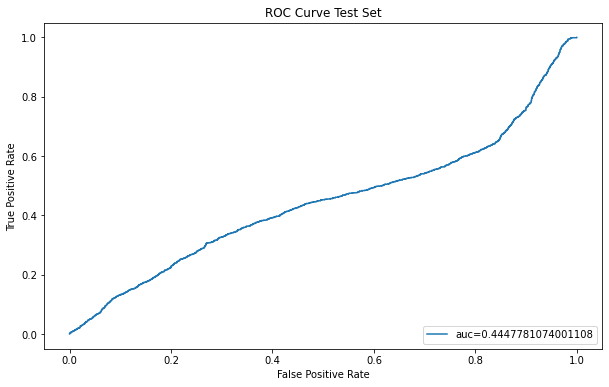

In [52]:
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00      2351

    accuracy                           1.00      4702
   macro avg       1.00      1.00      1.00      4702
weighted avg       1.00      1.00      1.00      4702

[[2351    0]
 [   0 2351]]


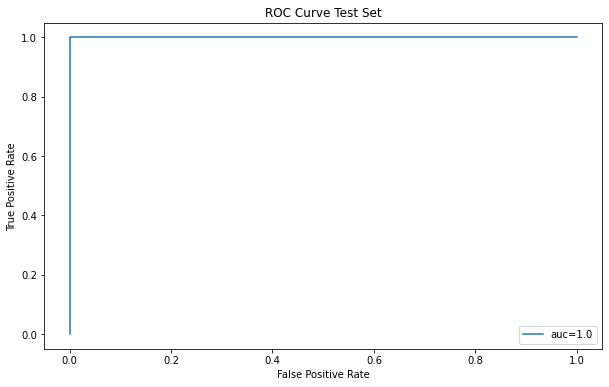

In [53]:
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

## Logistic Regression peform worst but does not suffer from overfitting.

In [54]:
# Scale the training set

df_scaler20 = StandardScaler().fit(num_train)
df_scaler25 = pd.DataFrame(df_scaler20.transform(num_train), columns=num_train.columns)
df_scaler25.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,...,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,...,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,...,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,...,-0.148869,0.823591,0.617581,-0.482592,2.682121,0.0,-0.815953,-0.706007,-0.321269,-0.783830
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.116088,...,-0.148869,-0.182561,0.617581,0.992851,-0.351986,0.0,0.438026,0.790900,2.031592,0.049082


In [55]:
# Scale the testing set

df_scaler21 = StandardScaler().fit(num_test)
df_scaler26 = pd.DataFrame(df_scaler21.transform(num_test), columns=num_test.columns)
df_scaler26.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2.273948,-1.132822,1.061318,0.917459,-0.152842,-0.323913,0.331114,0.875022,-0.334196,-0.404119,...,-0.164647,-0.260036,0.299444,-0.976752,-0.334196,0.0,1.745527,0.146528,1.591187,0.887063
1,-1.085188,0.084801,-1.005468,-0.547639,-0.541770,2.829374,-0.778578,-0.779056,-0.334196,-0.768384,...,-0.164647,-0.748331,-3.604666,-0.976752,-0.334196,0.0,-0.843948,-0.705592,-0.892419,-0.646997
2,-1.322303,0.380140,-1.279777,-0.771713,-0.767660,-0.323913,-0.778578,-1.109872,-0.334196,-0.613757,...,-0.164647,-0.748331,0.589104,-0.976752,-0.334196,0.0,-0.904456,-0.782393,-0.841807,-0.821505
3,0.297986,0.084801,-0.085885,0.228001,-0.512943,-0.323913,1.440806,-0.944464,-0.334196,-0.259142,...,-0.164647,0.716553,0.589104,0.530853,-0.334196,0.0,-0.729246,-0.340046,-0.606823,-0.397149
4,-1.322303,-0.405702,-1.307061,-0.633822,-0.326276,-0.323913,2.550498,-1.109872,-0.334196,-0.362227,...,-0.164647,0.228259,0.589104,-0.222950,-0.334196,0.0,-0.784379,-0.544196,-0.346532,-0.619713


In [56]:
# Scaled training set
df_train_cleaned2 = pd.concat([cat_train2, df_scaler25], axis=1)
df_train_cleaned2["loan_status"] = train_df.loan_status

df_train_cleaned2["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train_cleaned2.loan_status]
df_train_cleaned2.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_high_risk,loan_status_low_risk,pymnt_plan_n,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,0,1,0,0,1,0,0,0,1,1,...,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821,0
1,0,1,0,0,0,1,0,0,1,1,...,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905,0
2,0,1,0,0,0,1,0,0,1,1,...,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196,0
3,0,0,0,1,1,0,0,0,1,1,...,0.823591,0.617581,-0.482592,2.682121,0.0,-0.815953,-0.706007,-0.321269,-0.783830,0
4,0,1,0,0,0,1,0,0,1,1,...,-0.182561,0.617581,0.992851,-0.351986,0.0,0.438026,0.790900,2.031592,0.049082,0


In [59]:
# Scaled testing set
df_test_cleaned3 = pd.concat([cat_train2, df_scaler26], axis=1)
df_test_cleaned3["loan_status"] = test_df.loan_status

df_test_cleaned3["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train_cleaned3.loan_status]
df_test_cleaned3.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_high_risk,loan_status_low_risk,pymnt_plan_n,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,0,1,0,0,1,0,0,0,1,1,...,-0.260036,0.299444,-0.976752,-0.334196,0.0,1.745527,0.146528,1.591187,0.887063,0
1,0,1,0,0,0,1,0,0,1,1,...,-0.748331,-3.604666,-0.976752,-0.334196,0.0,-0.843948,-0.705592,-0.892419,-0.646997,0
2,0,1,0,0,0,1,0,0,1,1,...,-0.748331,0.589104,-0.976752,-0.334196,0.0,-0.904456,-0.782393,-0.841807,-0.821505,0
3,0,0,0,1,1,0,0,0,1,1,...,0.716553,0.589104,0.530853,-0.334196,0.0,-0.729246,-0.340046,-0.606823,-0.397149,0
4,0,1,0,0,0,1,0,0,1,1,...,0.228259,0.589104,-0.222950,-0.334196,0.0,-0.784379,-0.544196,-0.346532,-0.619713,0


In [60]:
X_train = df_train_cleaned2.drop(["loan_status"], axis=1).values
y_train = df_train_cleaned2["loan_status"].values

X_test = df_test_cleaned3.drop(["loan_status"], axis=1).values
y_test = df_test_cleaned3["loan_status"].values

In [64]:
X_train = X_train [~numpy.isnan(X_train)]
y_train = y_train [~numpy.isnan(y_train)]
X_test = X_test [~numpy.isnan(X_test)]
y_test = y_test [~numpy.isnan(y_test)]

In [65]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [62]:
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Based on the other Notebook label Credit Risk Scaled, the random forest still out-perform the Logisti Regression.